# Kurapati Venkatesh
# 09012021
# Topic: K-means Clustering

# ---------------------------------------------------------------------------

## 1.) Perform clustering (K means clustering) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained. Refer to EastWestAirlines.xlsx dataset.

## -----------------------------------------------------------------------------------

### Business objective: To identify customer via clustering or get to know the customer via segmentation

## -------------------------------------------------------------------------------------------

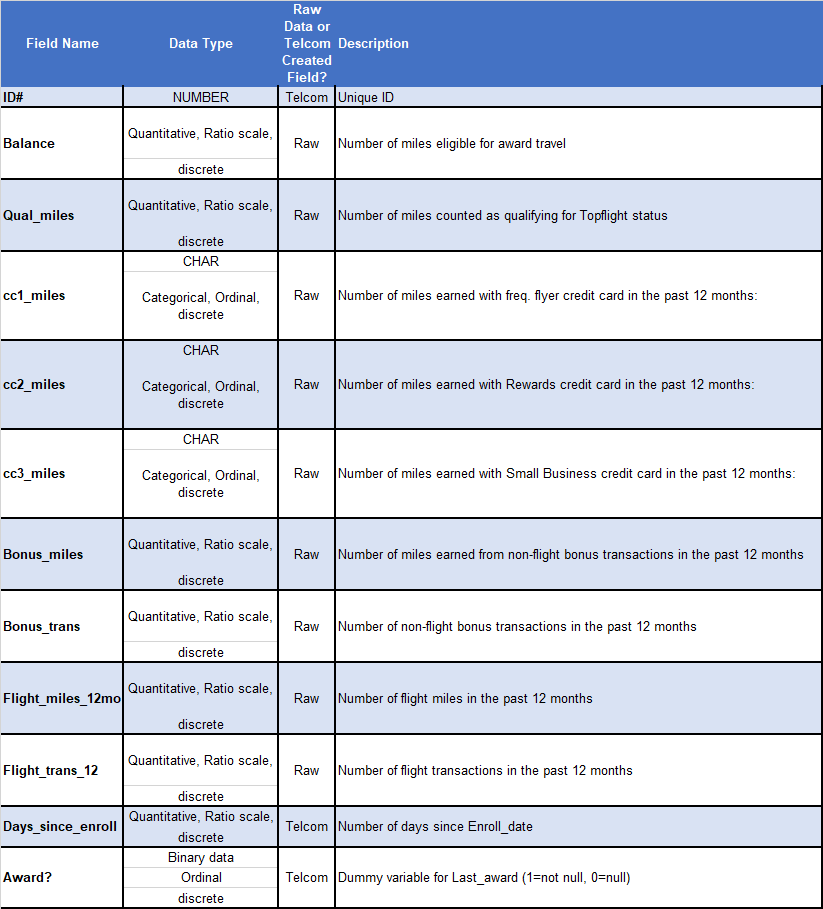

## ---------------------------------------------------------------------------------------------------------------------------

In [41]:
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization

In [5]:
air1 = pd.read_excel("C:/Users/Hp/Desktop/EastWestAirlines.xlsx")

In [6]:
air1.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
air = air1.drop(["ID#"], axis=1)

### ----------------------------------------------EDA---------------------------------------------------

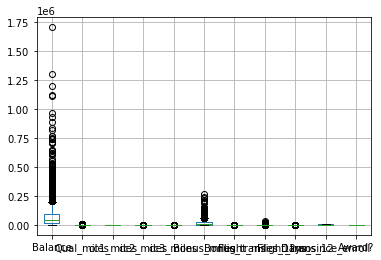

In [8]:
air.boxplot()

Looking at the box plot, it seems that the variables Balance, Qual_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12 have outlier present in the variables. These outliers value needs to be teated.

In [9]:
# create a user defined function remove_ol for getting the threshold value from IQR. 
def remove_ol(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

### Outliers Treatment:

#### Balance:

In [10]:
low, up = remove_ol(air['Balance'])
air['Balance'] = np.where(air['Balance'] > up, up, air['Balance']) 
air['Balance'] = np.where(air['Balance'] < low, low, air['Balance']) 

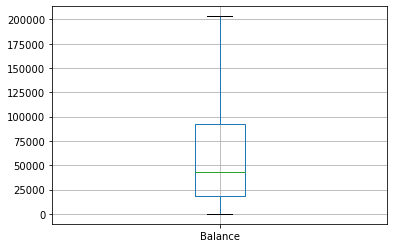

In [11]:
air.boxplot(['Balance'])

#### Qual_miles:

In [12]:
low, up = remove_ol(air['Qual_miles'])
air['Qual_miles'] = np.where(air['Qual_miles'] > up, up, air['Qual_miles']) 
air['Qual_miles'] = np.where(air['Qual_miles'] < low, low, air['Qual_miles']) 

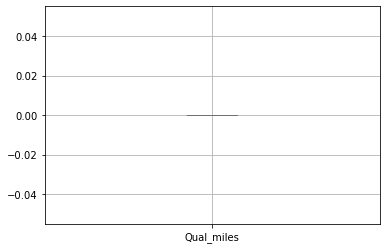

In [13]:
air.boxplot(['Qual_miles'])

#### Bonus_miles:

In [14]:
low, up = remove_ol(air['Bonus_miles'])
air['Bonus_miles'] = np.where(air['Bonus_miles'] > up, up, air['Bonus_miles']) 
air['Bonus_miles'] = np.where(air['Bonus_miles'] < low, low, air['Bonus_miles']) 

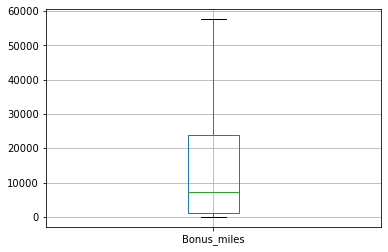

In [15]:
air.boxplot('Bonus_miles')

#### Bonus_trans

In [16]:
low, up = remove_ol(air['Bonus_trans'])
air['Bonus_trans'] = np.where(air['Bonus_trans'] > up, up, air['Bonus_trans']) 
air['Bonus_trans'] = np.where(air['Bonus_trans'] < low, low, air['Bonus_trans'])

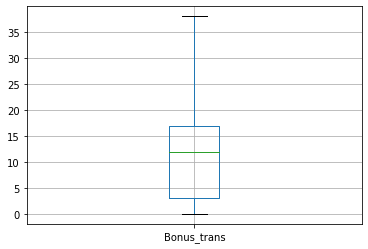

In [17]:
air.boxplot('Bonus_trans')

#### Flight_miles_12mo

In [19]:
low, up = remove_ol(air['Flight_miles_12mo'])
air['Flight_miles_12mo'] = np.where(air['Flight_miles_12mo'] > up, up, air['Flight_miles_12mo']) 
air['Flight_miles_12mo'] = np.where(air['Flight_miles_12mo'] < low, low, air['Flight_miles_12mo'])

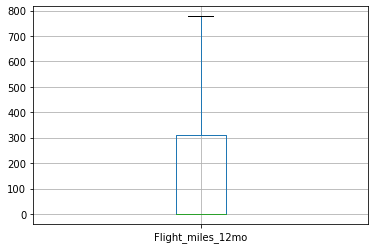

In [20]:
air.boxplot('Flight_miles_12mo')

#### Flight_trans_12

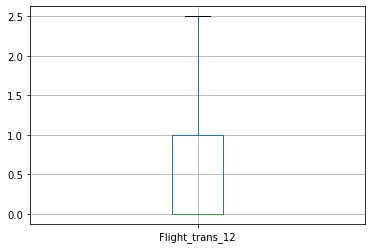

In [21]:
low, up = remove_ol(air['Flight_trans_12'])
air['Flight_trans_12'] = np.where(air['Flight_trans_12'] > up, up, air['Flight_trans_12']) 
air['Flight_trans_12'] = np.where(air['Flight_trans_12'] < low, low, air['Flight_trans_12'])

air.boxplot('Flight_trans_12')

##### Histogram Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE576EEB20>,
      dtype=object)

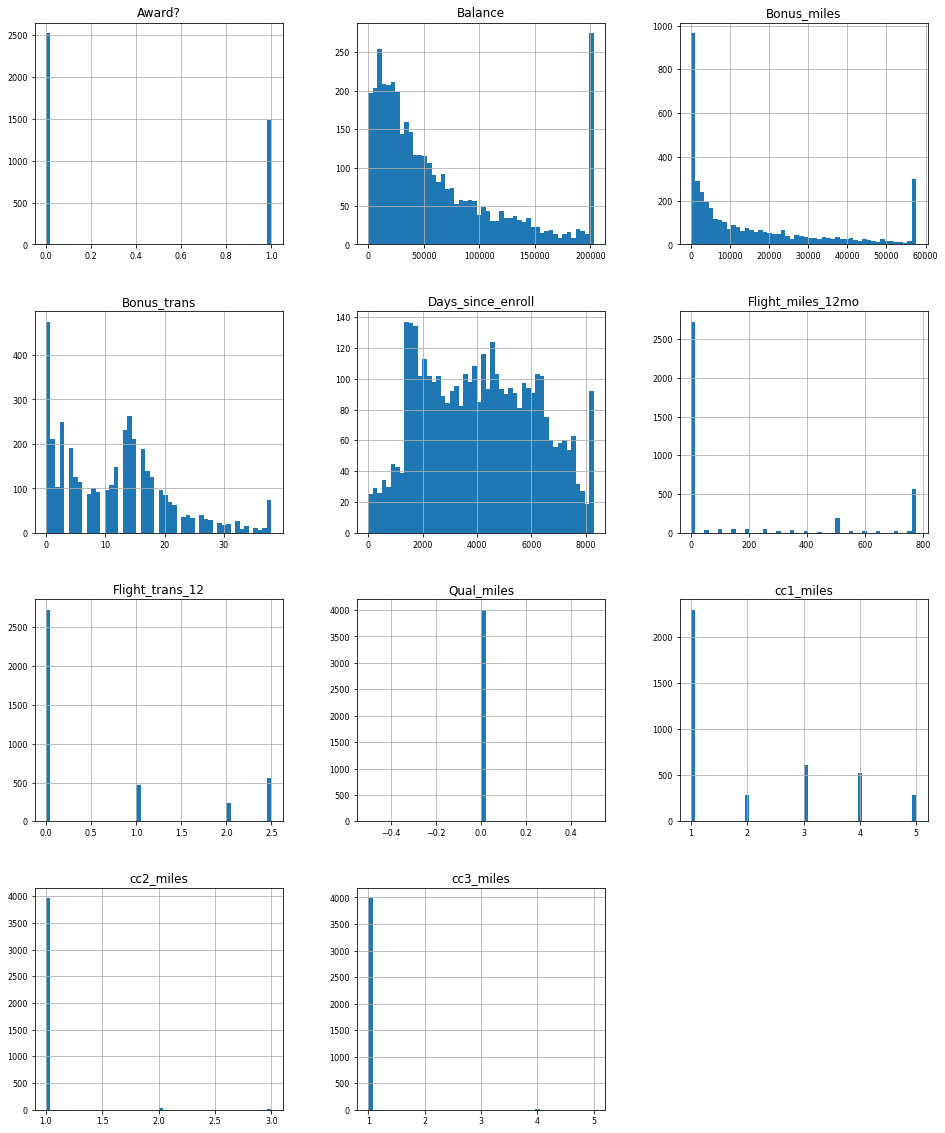

In [27]:
air.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

##### Corelation Analysis:

In [22]:
air.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,NaN,0.446510,-0.015658,0.036054,0.494422,0.409017,0.297045,0.295565,0.286143,0.170678
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,0.446510,NaN,1.000000,-0.068223,0.060555,0.912531,0.627786,0.098786,0.087618,0.230849,0.335457
cc2_miles,-0.015658,NaN,-0.068223,1.000000,-0.006166,0.001866,0.064435,0.012451,0.018273,-0.005807,0.005332
cc3_miles,0.036054,NaN,0.060555,-0.006166,1.000000,0.136254,0.100905,0.018554,0.011546,0.010832,0.023484
Bonus_miles,0.494422,NaN,0.912531,0.001866,0.136254,1.000000,0.663558,0.205801,0.193669,0.217320,0.394061
Bonus_trans,0.409017,NaN,0.627786,0.064435,0.100905,0.663558,1.000000,0.310543,0.308518,0.170308,0.337444
Flight_miles_12mo,0.297045,NaN,0.098786,0.012451,0.018554,0.205801,0.310543,1.000000,0.942734,0.095019,0.293119
Flight_trans_12,0.295565,NaN,0.087618,0.018273,0.011546,0.193669,0.308518,0.942734,1.000000,0.091898,0.300085
Days_since_enroll,0.286143,NaN,0.230849,-0.005807,0.010832,0.217320,0.170308,0.095019,0.091898,1.000000,0.188121


from the above histograms, the Qual_miles column can be excluded because it is unformly zero

In [33]:
df = air.drop(["Qual_miles"], axis=1)

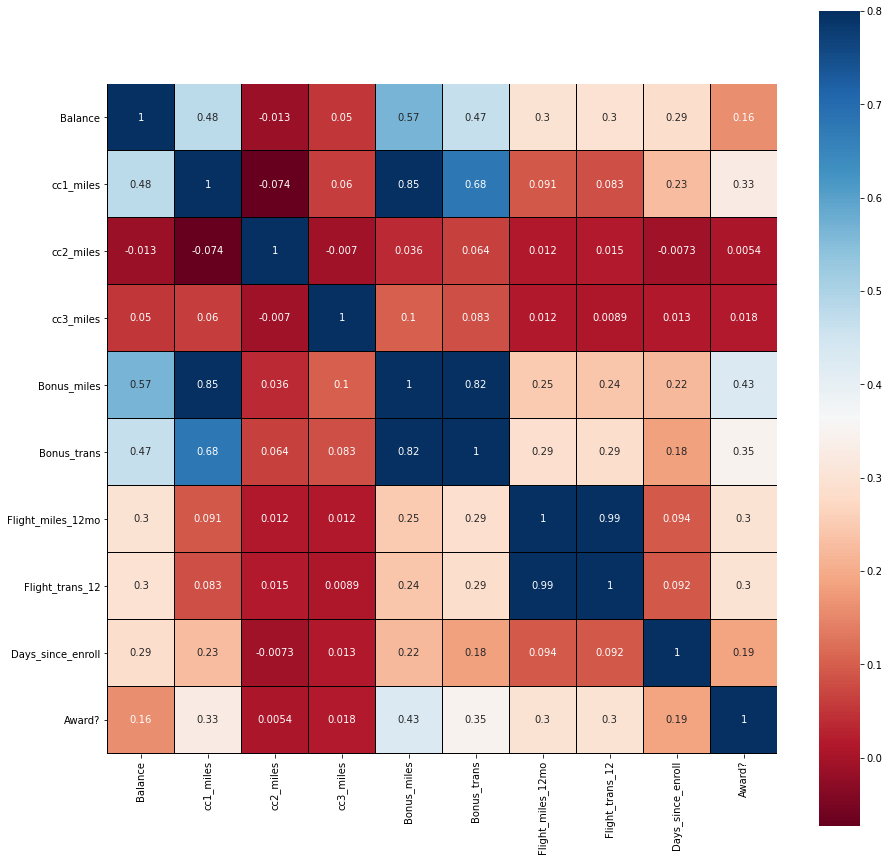

In [46]:
corr = df.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap='RdBu', linecolor='black')

Bonus_miles and Bonus_trans are highly corelated, 
Flight_miles_12 and flight_trans_12 are highly corelated.

### Normalization function 

In [48]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

#### Normalized data frame (considering the numerical part of data)

In [52]:
df_norm = norm_func(air1.iloc[:, 1:])
df_norm.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.138486,0.00,0.0,0.0,0.003019,0.026316,0.0,0.0,0.843742,0.0
1,0.094696,0.00,0.0,0.0,0.003731,0.052632,0.0,0.0,0.839884,0.0
2,0.203495,0.00,0.0,0.0,0.071547,0.105263,0.0,0.0,0.847842,0.0
3,0.072710,0.00,0.0,0.0,0.008677,0.026316,0.0,0.0,0.837955,0.0
4,0.481019,0.75,0.0,0.0,0.751394,0.684211,1.0,1.0,0.835905,1.0


#### Scree plot or Elbow curve ######################################################

In [50]:
TWSS = []
k = list(range(2, 10))

In [51]:
from sklearn.cluster import KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[823.6756984125229,
 625.1693121408786,
 436.70885761932624,
 348.9433217254147,
 315.3155964842897,
 287.7382625962098,
 263.0657501503543,
 243.9244361893846]

Text(0, 0.5, 'total_within_SS')

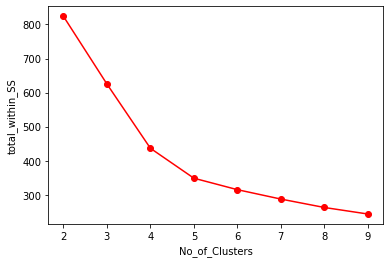

In [53]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

#### Selecting 5 clusters as optimum number of clusters from scree plot.

In [54]:
model = KMeans(n_clusters = 5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [55]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
air['clust'] = mb # creating a  new column and assigning it to new column 

In [56]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143.0,0.0,1,1,1,174.0,1.0,0.0,0.0,7000,0,0
1,19244.0,0.0,1,1,1,215.0,2.0,0.0,0.0,6968,0,0
2,41354.0,0.0,1,1,1,4123.0,4.0,0.0,0.0,7034,0,0
3,14776.0,0.0,1,1,1,500.0,1.0,0.0,0.0,6952,0,0
4,97752.0,0.0,4,1,1,43300.0,26.0,777.5,2.5,6935,1,4


In [57]:
air = air.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]
air.head()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143.0,0.0,1,1,1,174.0,1.0,0.0,0.0,7000,0
1,0,19244.0,0.0,1,1,1,215.0,2.0,0.0,0.0,6968,0
2,0,41354.0,0.0,1,1,1,4123.0,4.0,0.0,0.0,7034,0
3,0,14776.0,0.0,1,1,1,500.0,1.0,0.0,0.0,6952,0
4,4,97752.0,0.0,4,1,1,43300.0,26.0,777.5,2.5,6935,1


In [58]:
air.iloc[:, 2:12].groupby(air.clust).mean()
air.to_csv("Kmeans_airlines.csv", encoding = "utf-8")

import os
os.getcwd()

'C:\\Users\\Hp\\Documents\\jjjpter'

Almost four thousand people’s data is segmented into five clusters.

### Business Benefit: 

#### Once the segments are identified, marketing messages and advertisements can be customized for each segment. The better the segment(s) chosen for targeting by this airlines organization, the more successful the business will be in the market.
#### In this case, K-means Clustering can help this enterprise organize data into groups to identify similarities and, equally important, dissimilar groups and characteristics, so that the business can target pricing, products, services, marketing messages and more.
